## **USANDO ALGUNAS LIBRERIAS**

Esta idea o metodo fue adaptado originalmente del curso de coursera  Convolutional Neural Networks in TensorFlow en el cual no enseña como seria diferenciar una imagenes es un perro y un gato.
LO que yo trate de adaptar con la misma idea de zorros (distintas razas) y ciervos (igual).
Lo que adapte en gran parte es enrutado aplicando las clases de introduccón de machine learning  en el curso de coursera se veia como se utilizaba  librerias para poder desde nuestro OS abrir y descomprimir archivos tipo zip entonces yo lo que hice aplicando un poco de lo aprendido en el modelo pix2pix utilizando el google drive importar las imagnes ,guardalas en una lista y dar un orden random,etc.
el objetivo de esto era aplicar lo aprendido en el curso de Convolutional Neural Networks in TensorFlow de deeplearning.ai en coursera.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 2.x
import numpy as np
import scipy as sp
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os

## ENRUTADO DE LOS ARCHIVOS

In [0]:
PATH='/content/drive/My Drive/dataset/data_set_detc_img'

PATH_TRAIN=PATH +'/train'
PATH_VALIDATION=PATH +'/validacion'

PATH_TRAIN_C=PATH_TRAIN + '/ciervo' 
PATH_TRAIN_Z=PATH_TRAIN + '/zorros'

PATH_VALIDATION_C=PATH_VALIDATION + '/ciervos'
PATH_VALIDATION_Z=PATH_VALIDATION + '/zorros'

In [0]:
imgurlsC=!ls -1 '{PATH_TRAIN_C}' #convertimos en lista las imagenes  de ciervos

In [0]:
imgurlsZ=!ls -1 "{PATH_TRAIN_Z}" #convertimos en  lista las imagenes de zorros

In [0]:
n=len(imgurlsC)#numero de imagenes de ciervos

m=len(imgurlsZ)#numero de imagenes de zorros


randurlsC=np.copy(imgurlsC)
randurlsZ=np.copy(imgurlsZ)

#desordenando las imagenes

np.random.shuffle(randurlsC)
np.random.shuffle(randurlsZ)

#llenado con las imagenes de entrenamiento
train_C=randurlsC[:n]
train_Z=randurlsZ[:m]



## **PLOTEAR  IMAGENES**

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#graficaremos algunas imagenes en 4x4 
nfilas=4
ncolum=4
index=0 #este es nueestro iterador para las imagenes

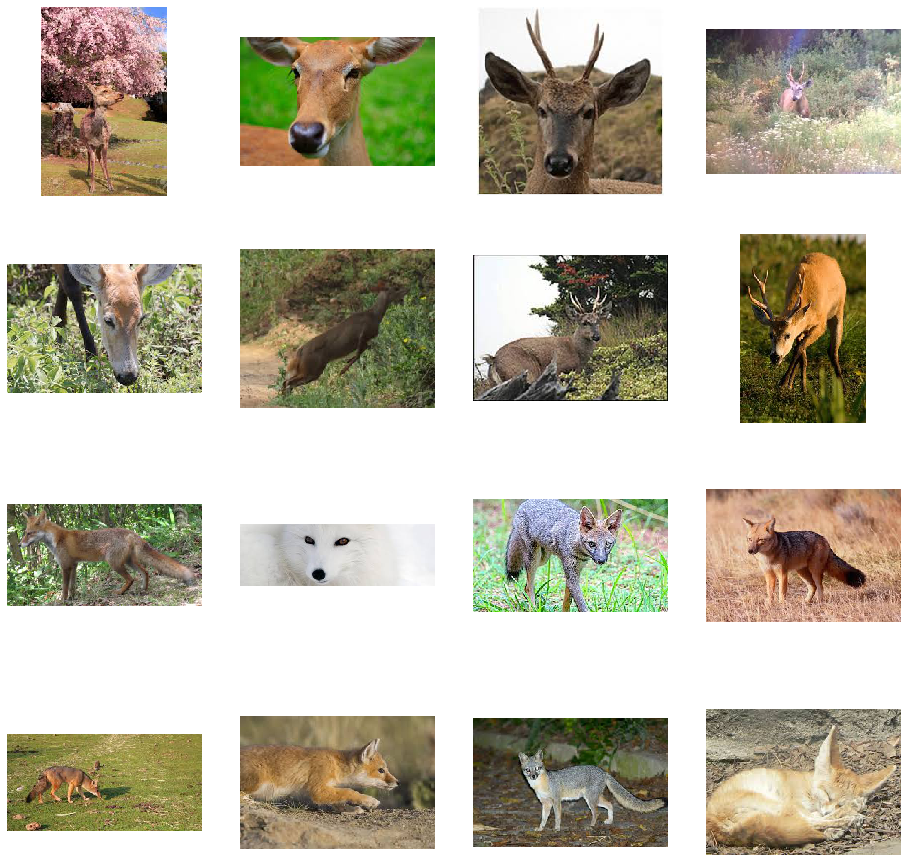

In [44]:
#vamos a plotear algunas imagnes en 4x4
fig = plt.gcf()
fig.set_size_inches(ncolum*4, nfilas*4)

index+=8

next_C_pix = [os.path.join(PATH_TRAIN_C, fname) 
                for fname in train_C[ index-8:index] 
               ]

next_Z_pix = [os.path.join(PATH_TRAIN_Z, fname) 
                for fname in train_Z[ index-8:index]
               ]

for i, img_path in enumerate(next_C_pix+next_Z_pix):
  
  sp = plt.subplot(nfilas, ncolum, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)


In [0]:
model = tf.keras.models.Sequential([
    # aqui usamos un redes convolucionales con un alto y ancho de 150x150 y 3 que vendria hacer los 3 canales de color RGBA
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    # 512 capas ocultas
    tf.keras.layers.Dense(512, activation='relu'), 
    # solo 1 una ouput. podira ser 0 (ciervo ) o 1(zorro)
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescalamos las imagenes a 1./255
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


# usamos las imagnes de entrenamiento en 20 lotes en la variable train_generator

train_generator = train_datagen.flow_from_directory(PATH_TRAIN,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# y para la validacion de imagnes en 20 lotes usamos validation_generator

validation_generator =  test_datagen.flow_from_directory(PATH_VALIDATION,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_steps=15,
                              verbose=2)

#esto nos da una exactitud de aprox 75%

Found 1402 images belonging to 2 classes.
Found 351 images belonging to 2 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 50 steps, validate for 15 steps
Epoch 1/20
50/50 - 29s - loss: 0.9778 - acc: 0.5499 - val_loss: 0.6605 - val_acc: 0.6067
Epoch 2/20
50/50 - 28s - loss: 0.6750 - acc: 0.6210 - val_loss: 0.7490 - val_acc: 0.5500
Epoch 3/20
50/50 - 28s - loss: 0.6085 - acc: 0.6843 - val_loss: 0.5907 - val_acc: 0.6667
Epoch 4/20
50/50 - 28s - loss: 0.5657 - acc: 0.7261 - val_loss: 0.5181 - val_acc: 0.7700
Epoch 5/20
50/50 - 28s - loss: 0.5035 - acc: 0.7620 - val_loss: 0.5111 - val_acc: 0.7700
Epoch 6/20
50/50 - 28s - loss: 0.4493 - acc: 0.8004 - val_loss: 0.5615 - val_acc: 0.7100
Epoch 7/20
50/50 - 29s - loss: 0.3964 - acc: 0.8218 - val_loss: 0.5360 - val_acc: 0.7533
Epoch 8/20
50/50 - 29s - loss: 0.3158 - acc: 0.8493 - val_loss: 0.5268 - val_acc: 0.7667
Epoch 9/20
50/50 - 28s - loss: 0.2878 - acc: 0.8859 - val_loss: 0.4976 - val_acc: 0.7867
Epoch 10/20
50/50 - 28s - loss: 0.2372 - acc: 0.8960 - val_loss: 0.6254 - val_acc: 0.7033
Epoch 11/20
50/50 - 28s - loss: 0.1868 - acc: 0.9297 - val_loss: 1.

In [59]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a  zorro")
    
  else:
    print(fn + " is a ciervo")
 

Saving images (1).jpg to images (1) (1).jpg
[0.]
images (1).jpg is a ciervo
